Goal : 
- Analize the different steps of the algorithm

- Visualize a simple implementation for 2D data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
#Generate X = 400 samples in a 2D rectangle 10x10
#Generate Y = 40 samples in a 2D rectangle 2x2
X = np.random.rand(400,2)*10
Y = np.random.rand(20,2)*2
 

In [14]:
#create a concat pd dataframe with X and Y and a column 'label' with 0 for X and 1 for Y
X_df = pd.DataFrame(X, columns=['x1','x2'])
Y_df = pd.DataFrame(Y, columns=['x1','x2'])
X_df['label'] = 0
Y_df['label'] = 1
data = pd.concat([X_df,Y_df], axis=0)

<Axes: xlabel='x1', ylabel='x2'>

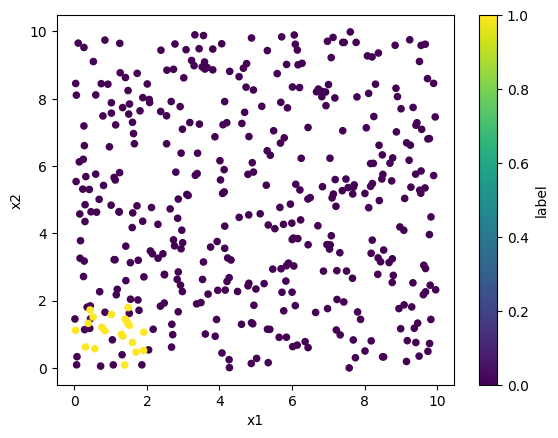

In [16]:
data.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')    

We clearily see that this dataset is imbalanced. Moreover the yellow sample is located in a specific space (bottom left hand corner). Without any over-sampling technique, the model will not not be able to predict the red class.

We will compare different methods. firstly without any over sampling technique, then random over sampling and finally with the SMOTE technique.

For these three methods, we will compare variance in the red samples, then decision boundary and the confusion matrix for a classification model. 

# Without Over Sampling 

In [24]:
print('variance of x1 :', round(Y_df.x1.var(), 2))
print('variance of x2 :', round(Y_df.x2.var(), 2))

variance of x1 : 0.33
variance of x2 : 0.21


# Random Over Sampling 

<Axes: xlabel='x1', ylabel='x2'>

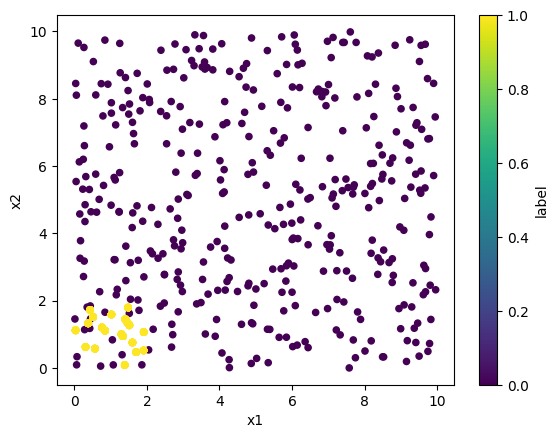

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data[['x1','x2']], data['label'])
data_resampled = pd.DataFrame(X_resampled, columns=['x1','x2'])
data_resampled['label'] = y_resampled
data_resampled.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')

In [29]:
data_resampled['label'].value_counts()

label
0    400
1    400
Name: count, dtype: int64

In [31]:
print('variance of x1 :', round(data_resampled[data_resampled['label'] == 1].x1.var(), 2))
print('variance of x2 :', round(data_resampled[data_resampled['label'] == 1].x2.var(), 2))

variance of x1 : 0.31
variance of x2 : 0.19


In [ ]:
pip install imbalanced-learn

# SMOTE 

<Axes: xlabel='x1', ylabel='x2'>

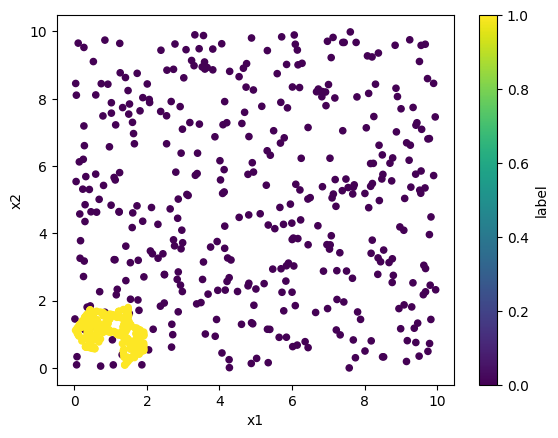

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(data[['x1','x2']], data['label'])
data_smote = pd.DataFrame(X_resampled, columns=['x1','x2'])
data_smote['label'] = y_resampled
data_smote.plot.scatter(x='x1', y='x2', c='label', colormap='viridis')


In [34]:
data_smote['label'].value_counts()

label
0    400
1    400
Name: count, dtype: int64

In [33]:
print('variance of x1 :', round(data_smote[data_smote['label'] == 1].x1.var(), 2))
print('variance of x2 :', round(data_smote[data_smote['label'] == 1].x2.var(), 2))

variance of x1 : 0.28
variance of x2 : 0.12


In [36]:
# compute the var/covar matrix of the minority class in the original dataset
minority_class = data[data['label'] == 1]
minority_class[['x1','x2']].cov()


,x1,x2
x1,0.325946,-0.059427
x2,-0.059427,0.208001
